In [1]:
import xarray as xr
import glob
import geopandas as gpd

team_folder = '/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team1'

chelsa_pr = xr.open_zarr(f'{team_folder}/CHELSA_SROCK_1999-2016_PR.zarr')
chelsa_tas = xr.open_zarr(f'{team_folder}/CHELSA_SROCK_1999-2016_TAS.zarr')
#chelsa_tasmax = xr.open_zarr(f'{team_folder}/CHELSA_SROCK_1999-2016_TASMAX.zarr.zip')

In [17]:
from matplotlib import pyplot as plt

In [3]:
 disturbance2002 = gpd.read_file(
     '/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team1/disturbance_shps/forest-disturbance2002/forest-disturbance2002.shp'
 )

In [4]:
points = disturbance2002.to_crs(epsg=4326).centroid

/tmp/ipykernel_4162/401017321.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points = disturbance2002.to_crs(epsg=4326).centroid


In [5]:
date = '2002-07-01'
all_points = list(zip(points.x, points.y))

In [6]:
pt = all_points[0]
# x, y, date_of_disturbance

In [15]:
test_tas = chelsa_tas.sel(lon=pt[0], lat=pt[1], method='nearest').sel(time=slice('2002-01-01', '2012-12-31'))

In [16]:
test_pr = chelsa_pr.sel(lon=pt[0], lat=pt[1], method='nearest').sel(time=slice('2002-01-01', '2012-12-31'))

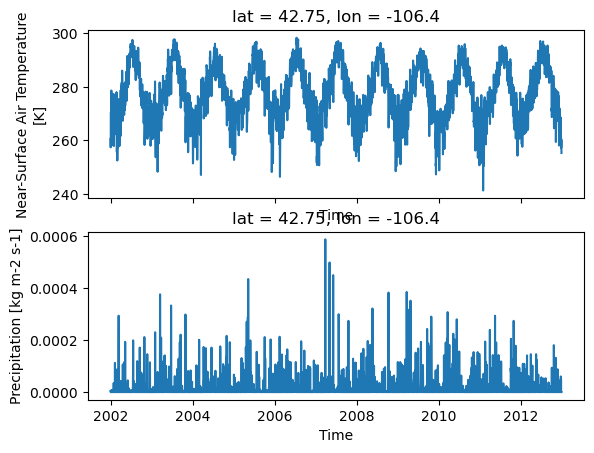

In [19]:
f, ax = plt.subplots(2, sharex=True)
test_tas['tas'].plot(ax=ax[0])
test_pr['pr'].plot(ax=ax[1])